In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [71]:
df_efficiency = pd.read_excel('quarter_df.xlsx')
df_efficiency

,Time,Effciency
0,07:00:00,5.846637
1,07:15:00,7.420760
2,07:30:00,8.611986
3,07:45:00,9.679471
4,08:00:00,10.562985
5,08:15:00,11.450532
6,08:30:00,12.182750
7,08:45:00,12.511210
8,09:00:00,12.763952
9,09:15:00,13.039757


In [26]:
df_irradiance = pd.read_excel('required irradiance-M15.xlsx')
df_irradiance

,Time,Irradiance (W/m2)
0,2022-09-01 00:00:00,18.619133
1,2022-09-01 00:15:00,19.185267
2,2022-09-01 00:30:00,19.824400
3,2022-09-01 00:45:00,20.102933
4,2022-09-01 01:00:00,20.197867
...,...,...
35035,2023-08-31 22:45:00,35.965400
35036,2023-08-31 23:00:00,36.038467
35037,2023-08-31 23:15:00,36.275000
35038,2023-08-31 23:30:00,36.937067


In [33]:
start_date = '2022-09-01 00:00:00'
end_date = '2023-08-31 23:45:00'
filtered_df = df_irradiance.loc[df_irradiance['Time'].between(start_date, end_date)]
filtered_df

#Only include data from 7am to 7pm of each day
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'])
filtered_df = filtered_df.set_index('Time')
filtered_df = filtered_df.between_time('07:00:00', '19:00:0')
filtered_df = filtered_df.reset_index()
filtered_df
filtered_df.to_excel('Irradiance @7am-7pm.xlsx', index=False)
df_irradiance = pd.read_excel('Irradiance @7am-7pm.xlsx')
df_irradiance

,Time,Irradiance (W/m2)
0,2022-09-01 07:00:00,120.008667
1,2022-09-01 07:15:00,172.780667
2,2022-09-01 07:30:00,223.512667
3,2022-09-01 07:45:00,271.164000
4,2022-09-01 08:00:00,318.764667
...,...,...
17880,2023-08-31 18:00:00,69.271267
17881,2023-08-31 18:15:00,59.413333
17882,2023-08-31 18:30:00,47.149000
17883,2023-08-31 18:45:00,41.681867


In [43]:
df_irradiance['Time'] = pd.to_datetime(df_irradiance['Time'])
df_irradiance
#drop the index column
#df_irradiance = df_irradiance.drop([0])
df_irradiance.set_index('Time', inplace=True)

In [44]:
df_irradiance

,Irradiance (W/m2)
Time,
2022-09-01 07:00:00,120.008667
2022-09-01 07:15:00,172.780667
2022-09-01 07:30:00,223.512667
2022-09-01 07:45:00,271.164000
2022-09-01 08:00:00,318.764667
...,...
2023-08-31 18:00:00,69.271267
2023-08-31 18:15:00,59.413333
2023-08-31 18:30:00,47.149000


In [47]:
import datetime as dt
import timedelta as td
#convert it to datetime index

quarter_df = pd.DataFrame()
for i in range(7, 20):
    time = dt.time(i, 0)
    for j in range(0, 59, 15):
        time = dt.time(i, j)   
        quarterly_df = df_irradiance.between_time(time, time)
        interval_df = quarterly_df.mean()
        print(interval_df)

        quarter_df = pd.concat([quarter_df, interval_df]) 
quarter_df
quarter_df.index = pd.date_range(start='07:00:00', periods=52, freq='15T')
quarter_df
#remove the date
quarter_df.index = quarter_df.index.time
quarter_df

Irradiance (W/m2)    95.545103
dtype: float64
Irradiance (W/m2)    123.980809
dtype: float64
Irradiance (W/m2)    158.880328
dtype: float64
Irradiance (W/m2)    192.175431
dtype: float64
Irradiance (W/m2)    223.401663
dtype: float64
Irradiance (W/m2)    250.629771
dtype: float64
Irradiance (W/m2)    288.297232
dtype: float64
Irradiance (W/m2)    330.562177
dtype: float64
Irradiance (W/m2)    367.248069
dtype: float64
Irradiance (W/m2)    404.155803
dtype: float64
Irradiance (W/m2)    434.300388
dtype: float64
Irradiance (W/m2)    462.795504
dtype: float64
Irradiance (W/m2)    493.594475
dtype: float64
Irradiance (W/m2)    520.804225
dtype: float64
Irradiance (W/m2)    536.382425
dtype: float64
Irradiance (W/m2)    561.930812
dtype: float64
Irradiance (W/m2)    572.108001
dtype: float64
Irradiance (W/m2)    602.338901
dtype: float64
Irradiance (W/m2)    616.035196
dtype: float64
Irradiance (W/m2)    616.885181
dtype: float64
Irradiance (W/m2)    626.238808
dtype: float64
Irradiance (W/

,0
07:00:00,95.545103
07:15:00,123.980809
07:30:00,158.880328
07:45:00,192.175431
08:00:00,223.401663
08:15:00,250.629771
08:30:00,288.297232
08:45:00,330.562177
09:00:00,367.248069
09:15:00,404.155803


In [49]:
quarter_df.to_excel('irradiance within a day.xlsx')

Start Comparison

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import timedelta as td 
import os

In [70]:
irradiance_df = pd.read_excel('irradiance within a day.xlsx')
irradiance_df

,Time,Irradiance (W/m2)
0,07:00:00,95.545103
1,07:15:00,123.980809
2,07:30:00,158.880328
3,07:45:00,192.175431
4,08:00:00,223.401663
5,08:15:00,250.629771
6,08:30:00,288.297232
7,08:45:00,330.562177
8,09:00:00,367.248069
9,09:15:00,404.155803


In [72]:
df_efficiency


,Time,Effciency
0,07:00:00,5.846637
1,07:15:00,7.420760
2,07:30:00,8.611986
3,07:45:00,9.679471
4,08:00:00,10.562985
5,08:15:00,11.450532
6,08:30:00,12.182750
7,08:45:00,12.511210
8,09:00:00,12.763952
9,09:15:00,13.039757


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


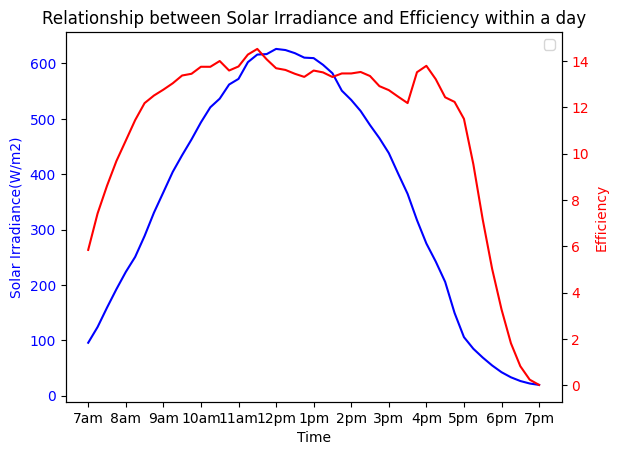

In [83]:

fig, ax1 = plt.subplots()

# Plot the first dataset on the first y-axis
ax1.plot(irradiance_df['Time'], irradiance_df['Irradiance (W/m2)'], color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Solar Irradiance(W/m2)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
ax2.plot(df_efficiency['Time'], df_efficiency['Effciency'], color='red')
ax2.set_ylabel('Efficiency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#add the points on the data
#ax1.scatter(data4['Time'], data4['W/m2'], color='blue')
#plt.scatter(data2['Month'], data2['Mean'], color='red')
#adjust the x axis
plt.xticks(np.arange(0, 51, step=4), ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm'])

# Customize the graph
plt.title('Relationship between Solar Irradiance and Efficiency within a day')
plt.legend()
plt.show()


Comparison for June and December

In [102]:
df = pd.read_excel(r'C:\Users\nickc\OneDrive - HKUST Connect\桌面\FYP Code\dataset_temporary version_0227\PV generation dataset\Efficiency with optimizer\All Efficiency @7am-7pm.xlsx')
df

,Time,Indoor Sports Centre,Library,LSK North,LSK South,S H Ho Sports Hall,Shaw Auditorium,SQ Apartment1-12,SQ Apartment13-24,SQ Apartment25-36,...,UG Hall9,Wong Check She Research Centre,Zone A1,Zone A2,Zone A4,Zone A5,Zone A6,Zone A7,Zone D,Zone J2
0,2022-09-01 07:00:00,13.243705,13.672668,13.974872,16.573307,12.847017,NaN,9.945020,8.020506,8.332729,...,NaN,13.668761,8.675815,5.737559,5.503774,5.622347,14.309377,3.111640,8.654725,NaN
1,2022-09-01 07:15:00,14.941745,15.444832,15.255759,18.177544,14.394017,NaN,10.963890,9.365878,9.653840,...,NaN,16.146696,9.194974,6.644253,5.599828,6.043376,16.049877,3.846830,10.582381,NaN
2,2022-09-01 07:30:00,15.967707,16.172525,15.940151,18.929523,15.011191,NaN,11.889949,10.591440,11.031147,...,NaN,17.107256,9.620008,7.290412,5.758474,6.367506,16.843911,4.241903,11.248355,NaN
3,2022-09-01 07:45:00,16.969085,16.939192,17.451269,19.557656,15.266957,NaN,12.944690,11.889090,13.181406,...,NaN,17.930866,10.076518,7.931869,6.143731,6.734197,18.636312,4.388104,11.992170,NaN
4,2022-09-01 08:00:00,17.711631,17.232686,18.508536,20.002786,15.448070,NaN,14.193108,12.991640,14.233574,...,NaN,18.560588,10.373686,8.551437,7.125765,7.415727,19.086945,4.848419,12.535837,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,2023-08-31 18:00:00,3.624177,3.144747,2.845053,0.000000,1.898031,1.676899,2.899613,2.948383,2.793205,...,3.321657,3.110864,2.842302,5.251301,2.360118,2.439877,2.431894,0.506857,3.187903,0.876526
17881,2023-08-31 18:15:00,1.771081,1.359712,0.863333,0.000000,0.412819,0.636323,0.589300,1.142415,1.023521,...,0.813554,1.179681,0.702348,2.387160,0.577317,0.807206,0.626957,0.231364,1.481868,0.305667
17882,2023-08-31 18:30:00,0.000000,0.431660,0.549316,0.000000,0.000000,0.003909,0.000000,0.000000,0.000000,...,0.000000,0.425577,0.000000,0.547679,0.000000,0.000000,0.000000,0.000000,0.995471,0.000000
17883,2023-08-31 18:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [103]:
import timedelta as td
import datetime as dt  
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df

,Indoor Sports Centre,Library,LSK North,LSK South,S H Ho Sports Hall,Shaw Auditorium,SQ Apartment1-12,SQ Apartment13-24,SQ Apartment25-36,SQ Block P,...,UG Hall9,Wong Check She Research Centre,Zone A1,Zone A2,Zone A4,Zone A5,Zone A6,Zone A7,Zone D,Zone J2
Time,,,,,,,,,,,,,,,,,,,,,
2022-09-01 07:00:00,13.243705,13.672668,13.974872,16.573307,12.847017,NaN,9.945020,8.020506,8.332729,NaN,...,NaN,13.668761,8.675815,5.737559,5.503774,5.622347,14.309377,3.111640,8.654725,NaN
2022-09-01 07:15:00,14.941745,15.444832,15.255759,18.177544,14.394017,NaN,10.963890,9.365878,9.653840,NaN,...,NaN,16.146696,9.194974,6.644253,5.599828,6.043376,16.049877,3.846830,10.582381,NaN
2022-09-01 07:30:00,15.967707,16.172525,15.940151,18.929523,15.011191,NaN,11.889949,10.591440,11.031147,NaN,...,NaN,17.107256,9.620008,7.290412,5.758474,6.367506,16.843911,4.241903,11.248355,NaN
2022-09-01 07:45:00,16.969085,16.939192,17.451269,19.557656,15.266957,NaN,12.944690,11.889090,13.181406,NaN,...,NaN,17.930866,10.076518,7.931869,6.143731,6.734197,18.636312,4.388104,11.992170,NaN
2022-09-01 08:00:00,17.711631,17.232686,18.508536,20.002786,15.448070,NaN,14.193108,12.991640,14.233574,NaN,...,NaN,18.560588,10.373686,8.551437,7.125765,7.415727,19.086945,4.848419,12.535837,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 18:00:00,3.624177,3.144747,2.845053,0.000000,1.898031,1.676899,2.899613,2.948383,2.793205,3.661722,...,3.321657,3.110864,2.842302,5.251301,2.360118,2.439877,2.431894,0.506857,3.187903,0.876526
2023-08-31 18:15:00,1.771081,1.359712,0.863333,0.000000,0.412819,0.636323,0.589300,1.142415,1.023521,1.419314,...,0.813554,1.179681,0.702348,2.387160,0.577317,0.807206,0.626957,0.231364,1.481868,0.305667
2023-08-31 18:30:00,0.000000,0.431660,0.549316,0.000000,0.000000,0.003909,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.425577,0.000000,0.547679,0.000000,0.000000,0.000000,0.000000,0.995471,0.000000


In [164]:
mean_df = df.resample('15T').mean()
mean_df['All Locations'] = df.mean(axis=1)
mean_df
#print all values
location_mean_df = mean_df['All Locations']
location_mean_df 
location_mean_df = location_mean_df.to_frame()
location_mean_df

,All Locations
Time,
2022-09-01 07:00:00,11.015535
2022-09-01 07:15:00,12.390065
2022-09-01 07:30:00,13.179211
2022-09-01 07:45:00,14.026034
2022-09-01 08:00:00,14.662814
...,...
2023-08-31 18:00:00,2.561098
2023-08-31 18:15:00,0.912104
2023-08-31 18:30:00,0.137019


In [165]:
#I need data from June only
July_mean_df = location_mean_df.loc['2023-07-01 07:00:00':'2023-07-31 15:00:00']
July_mean_df

,All Locations
Time,
2023-07-01 07:00:00,10.660829
2023-07-01 07:15:00,9.698065
2023-07-01 07:30:00,9.826127
2023-07-01 07:45:00,8.516765
2023-07-01 08:00:00,8.696274
...,...
2023-07-31 14:00:00,16.207691
2023-07-31 14:15:00,15.331132
2023-07-31 14:30:00,17.829349


In [167]:
December_mean_df = location_mean_df.loc['2022-12-01 07:00:00':'2022-12-31 15:00:00']
December_mean_df

,All Locations
Time,
2022-12-01 07:00:00,3.522878
2022-12-01 07:15:00,6.667886
2022-12-01 07:30:00,8.193181
2022-12-01 07:45:00,10.331347
2022-12-01 08:00:00,15.075311
...,...
2022-12-31 14:00:00,15.458017
2022-12-31 14:15:00,15.321021
2022-12-31 14:30:00,15.038184


In [169]:
December_mean_df = December_mean_df.reset_index()
December_mean_df = December_mean_df.set_index('Time')
December_daily_df = pd.DataFrame()
for i in range(7, 16):
    time = dt.time(i, 0)
    for j in range(0, 59, 15):
        time = dt.time(i, j)   
        quarterly_df = December_mean_df.between_time(time, time)
        interval_df = quarterly_df.mean()
        print(interval_df)
        December_daily_df = pd.concat([December_daily_df, interval_df])
December_daily_df.index = pd.date_range(start='07:00:00', periods=36, freq='15T')
December_daily_df.index = December_daily_df.index.time
December_daily_df
#Change the label of the column
December_daily_df.columns = ['Efficiency']
December_daily_df
#Remove the last three row
December_daily_df = December_daily_df[:-3]
December_daily_df.to_excel('December Efficiency.xlsx')


All Locations    2.749455
dtype: float64
All Locations    6.99586
dtype: float64
All Locations    9.319196
dtype: float64
All Locations    10.853892
dtype: float64
All Locations    12.889389
dtype: float64
All Locations    13.970293
dtype: float64
All Locations    14.229648
dtype: float64
All Locations    13.513149
dtype: float64
All Locations    14.273742
dtype: float64
All Locations    15.357252
dtype: float64
All Locations    15.912491
dtype: float64
All Locations    15.980316
dtype: float64
All Locations    16.325882
dtype: float64
All Locations    15.986258
dtype: float64
All Locations    16.389442
dtype: float64
All Locations    16.413576
dtype: float64
All Locations    16.490191
dtype: float64
All Locations    16.318537
dtype: float64
All Locations    16.524497
dtype: float64
All Locations    16.686302
dtype: float64
All Locations    16.379908
dtype: float64
All Locations    16.464436
dtype: float64
All Locations    16.609472
dtype: float64
All Locations    16.858958
dtype: floa

In [170]:
# Change the dataframe be datetime index
July_mean_df = July_mean_df.reset_index()
July_mean_df = July_mean_df.set_index('Time')
July_mean_df

July_daily_df = pd.DataFrame()
for i in range(7, 16):
    time = dt.time(i, 0)
    for j in range(0, 59, 15):
        time = dt.time(i, j)   
        quarterly_df = July_mean_df.between_time(time, time)
        interval_df = quarterly_df.mean()
        July_daily_df = pd.concat([July_daily_df, interval_df]) 
July_daily_df


,0
All Locations,7.308779
All Locations,7.907343
All Locations,8.321830
All Locations,9.058015
All Locations,9.155769
All Locations,9.652100
All Locations,10.040934
All Locations,10.311655
All Locations,10.536988
All Locations,10.071548


In [171]:
July_daily_df.index = pd.date_range(start='07:00:00', periods=36, freq='15T')
July_daily_df.index = July_daily_df.index.time
July_daily_df
#Change the label of the column
July_daily_df.columns = ['Efficiency']
July_daily_df
#Remove the last three row
July_daily_df = July_daily_df[:-3]
July_daily_df.to_excel('July Efficiency.xlsx')

Plot Graph

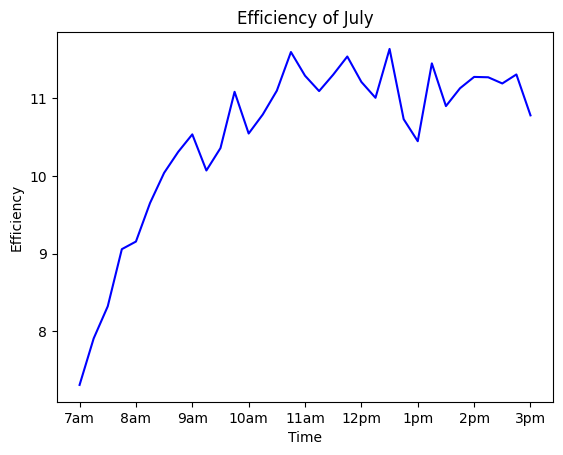

In [176]:
July_efficiency = pd.read_excel(r'C:\Users\nickc\OneDrive - HKUST Connect\桌面\FYP Code\dataset_temporary version_0227\July Vs December\July Efficiency.xlsx')
December_efficiency = pd.read_excel(r'C:\Users\nickc\OneDrive - HKUST Connect\桌面\FYP Code\dataset_temporary version_0227\July Vs December\December Efficiency.xlsx')
#Plot the graph for July_efficiency
#July_efficiency = July_efficiency.reset_index()
#July_efficiency = July_efficiency.set_index('Time')
July_efficiency
plt.plot(July_efficiency['Time'], July_efficiency['Efficiency'], color='blue')
plt.title('Efficiency of July')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.xticks(np.arange(0, 36, step=4), ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm'])
plt.show()

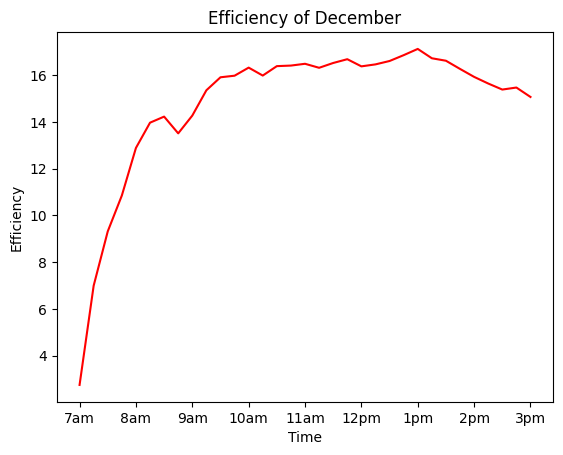

In [177]:
December_efficiency
plt.plot(December_efficiency['Time'], December_efficiency['Efficiency'], color='red')
plt.title('Efficiency of December')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.xticks(np.arange(0, 36, step=4), ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm'])
plt.show()


Include irradiance into graph

In [2]:
import pandas as pd
irradiance = pd.read_excel('Irradiance @7am-7pm.xlsx')
irradiance

,Time,Irradiance (W/m2)
0,2022-09-01 07:00:00,120.008667
1,2022-09-01 07:15:00,172.780667
2,2022-09-01 07:30:00,223.512667
3,2022-09-01 07:45:00,271.164000
4,2022-09-01 08:00:00,318.764667
...,...,...
17880,2023-08-31 18:00:00,69.271267
17881,2023-08-31 18:15:00,59.413333
17882,2023-08-31 18:30:00,47.149000
17883,2023-08-31 18:45:00,41.681867


In [4]:
start_date = '2022-12-01 07:00:00'
end_date = '2022-12-31 15:00:00'
December_irradiance= irradiance.loc[irradiance['Time'].between(start_date, end_date)]
December_irradiance
# I want data from 7am to 3pm
December_irradiance = December_irradiance.reset_index()
December_irradiance = December_irradiance.set_index('Time')
December_irradiance = December_irradiance.between_time('07:00:00', '15:00:00')
December_irradiance
#remove the index column
December_irradiance = December_irradiance.drop(columns='index')
December_irradiance
December_irradiance.to_excel('December Irradiance.xlsx')

In [5]:
December_irradiance

,Irradiance (W/m2)
Time,
2022-12-01 07:00:00,26.892667
2022-12-01 07:15:00,33.321533
2022-12-01 07:30:00,35.325067
2022-12-01 07:45:00,41.051800
2022-12-01 08:00:00,46.603000
...,...
2022-12-31 14:00:00,500.655333
2022-12-31 14:15:00,470.263333
2022-12-31 14:30:00,441.421333


In [7]:
# Change the dataframe be datetime index
#filtered_df = filtered_df.reset_index()
#filtered_df = filtered_df.set_index('Time')
#filtered_df
import datetime as dt   
December_daily_irradiance_df = pd.DataFrame()
for i in range(7, 16):
    time = dt.time(i, 0)
    for j in range(0, 59, 15):
        time = dt.time(i, j)   
        quarterly_df = December_irradiance.between_time(time, time)
        interval_df = quarterly_df.mean()
        December_daily_irradiance_df = pd.concat([December_daily_irradiance_df, interval_df]) 
December_daily_irradiance_df

,0
Irradiance (W/m2),22.210187
Irradiance (W/m2),36.297180
Irradiance (W/m2),57.533469
Irradiance (W/m2),89.538791
Irradiance (W/m2),106.788247
Irradiance (W/m2),127.501409
Irradiance (W/m2),168.734978
Irradiance (W/m2),225.577004
Irradiance (W/m2),263.482913
Irradiance (W/m2),282.346536


In [8]:
December_daily_irradiance_df.index = pd.date_range(start='07:00:00', periods=36, freq='15T')
December_daily_irradiance_df.index = December_daily_irradiance_df.index.time
December_daily_irradiance_df
#Change the label of the column
December_daily_irradiance_df.columns = ['Efficiency']
December_daily_irradiance_df
#Remove the last three row
December_daily_irradiance_df = December_daily_irradiance_df[:-3]
December_daily_irradiance_df.to_excel('December Irradiance.xlsx')

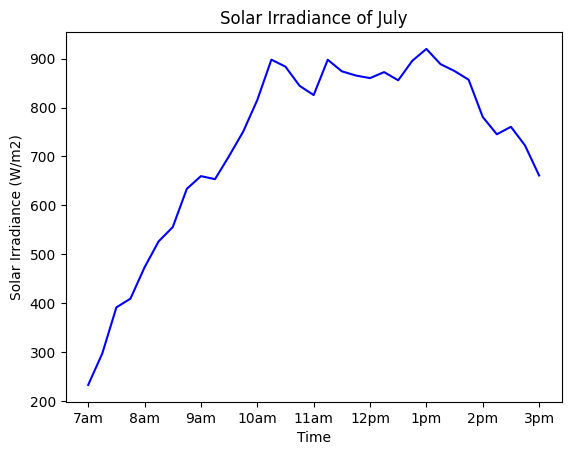

In [229]:
July_solar = pd.read_excel(r'C:\Users\nickc\OneDrive - HKUST Connect\桌面\FYP Code\dataset_temporary version_0227\July Vs December\July Irradiance.xlsx')
July_solar
#plot the graph for July solar irradiance
plt.plot(July_solar['Time'], July_solar['Irradiance'], color='blue')
plt.title('Solar Irradiance of July')
plt.xlabel('Time')
plt.ylabel('Solar Irradiance (W/m2)')
plt.xticks(np.arange(0, 36, step=4), ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm'])
plt.show()

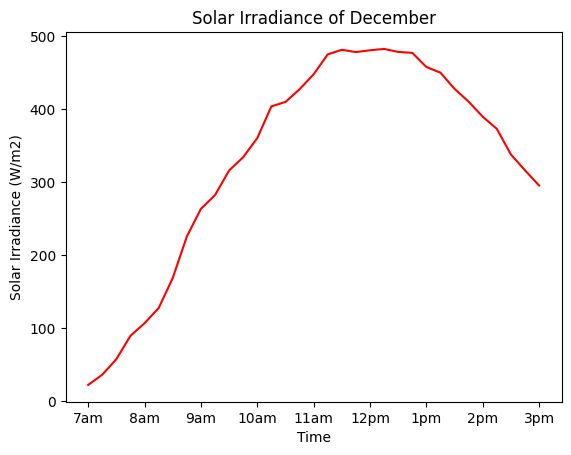

In [9]:
Dec_solar = pd.read_excel(r'C:\Users\nickc\OneDrive - HKUST Connect\桌面\FYP Code\dataset_temporary version_0227\July Vs December\December Irradiance.xlsx')
Dec_solar
#plot the graph for December solar irradiance
plt.plot(Dec_solar['Time'], Dec_solar['Irradiance'], color='red')
plt.title('Solar Irradiance of December')
plt.xlabel('Time')
plt.ylabel('Solar Irradiance (W/m2)')
plt.xticks(np.arange(0, 36, step=4), ['7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm'])
plt.show()